1/1 [==============================] - 0s 65ms/step


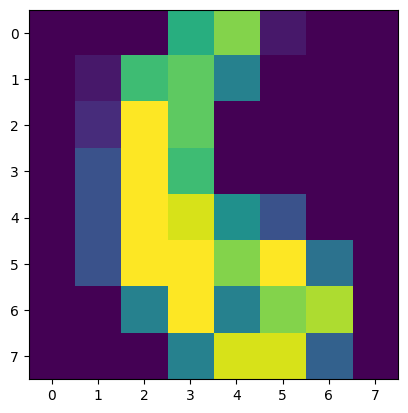

Number in the image is: 6


In [2]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from keras.utils.np_utils import to_categorical

from keras.models import Sequential
from keras import optimizers
from keras.layers import Dense, Activation, Flatten, Conv2D, MaxPooling2D


import warnings
warnings.filterwarnings("ignore")

data = datasets.load_digits()
# plt.imshow(data.images[0])    # show first number in the dataset
# plt.show()

X_data = data.images
y_data = data.target



# partition data into train/test sets
X_data = X_data.reshape((X_data.shape[0], X_data.shape[1], X_data.shape[2], 1))
y_data = to_categorical(y_data)
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size = 0.3, random_state = 777)
model = Sequential()


# convolution layer
model.add(Conv2D(input_shape = (X_data.shape[1], X_data.shape[2], X_data.shape[3]), filters = 10, kernel_size = (3,3), strides = (1,1), padding = 'valid'))

model.add(Activation('relu'))


# prior layer should be flattend to be connected to dense layers
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Flatten())

model.add(Dense(50, activation = 'relu'))
model.add(Dense(10, activation = 'softmax'))

adam = optimizers.Adam(lr = 0.001)
model.compile(loss = 'categorical_crossentropy', optimizer = adam, metrics = ['accuracy'])

history = model.fit(X_train, y_train, batch_size = 50, validation_split = 0.2, epochs = 100, verbose = 0)




p = model.predict(X_test[1:2])
plt.imshow(X_test[1])    # show first number in the dataset
plt.show()

p = np.argmax(p, axis = -1)


print('Number in the image is:',p[0])